In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Monza', 'R')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

Text(0.5, 0, 'Lap')

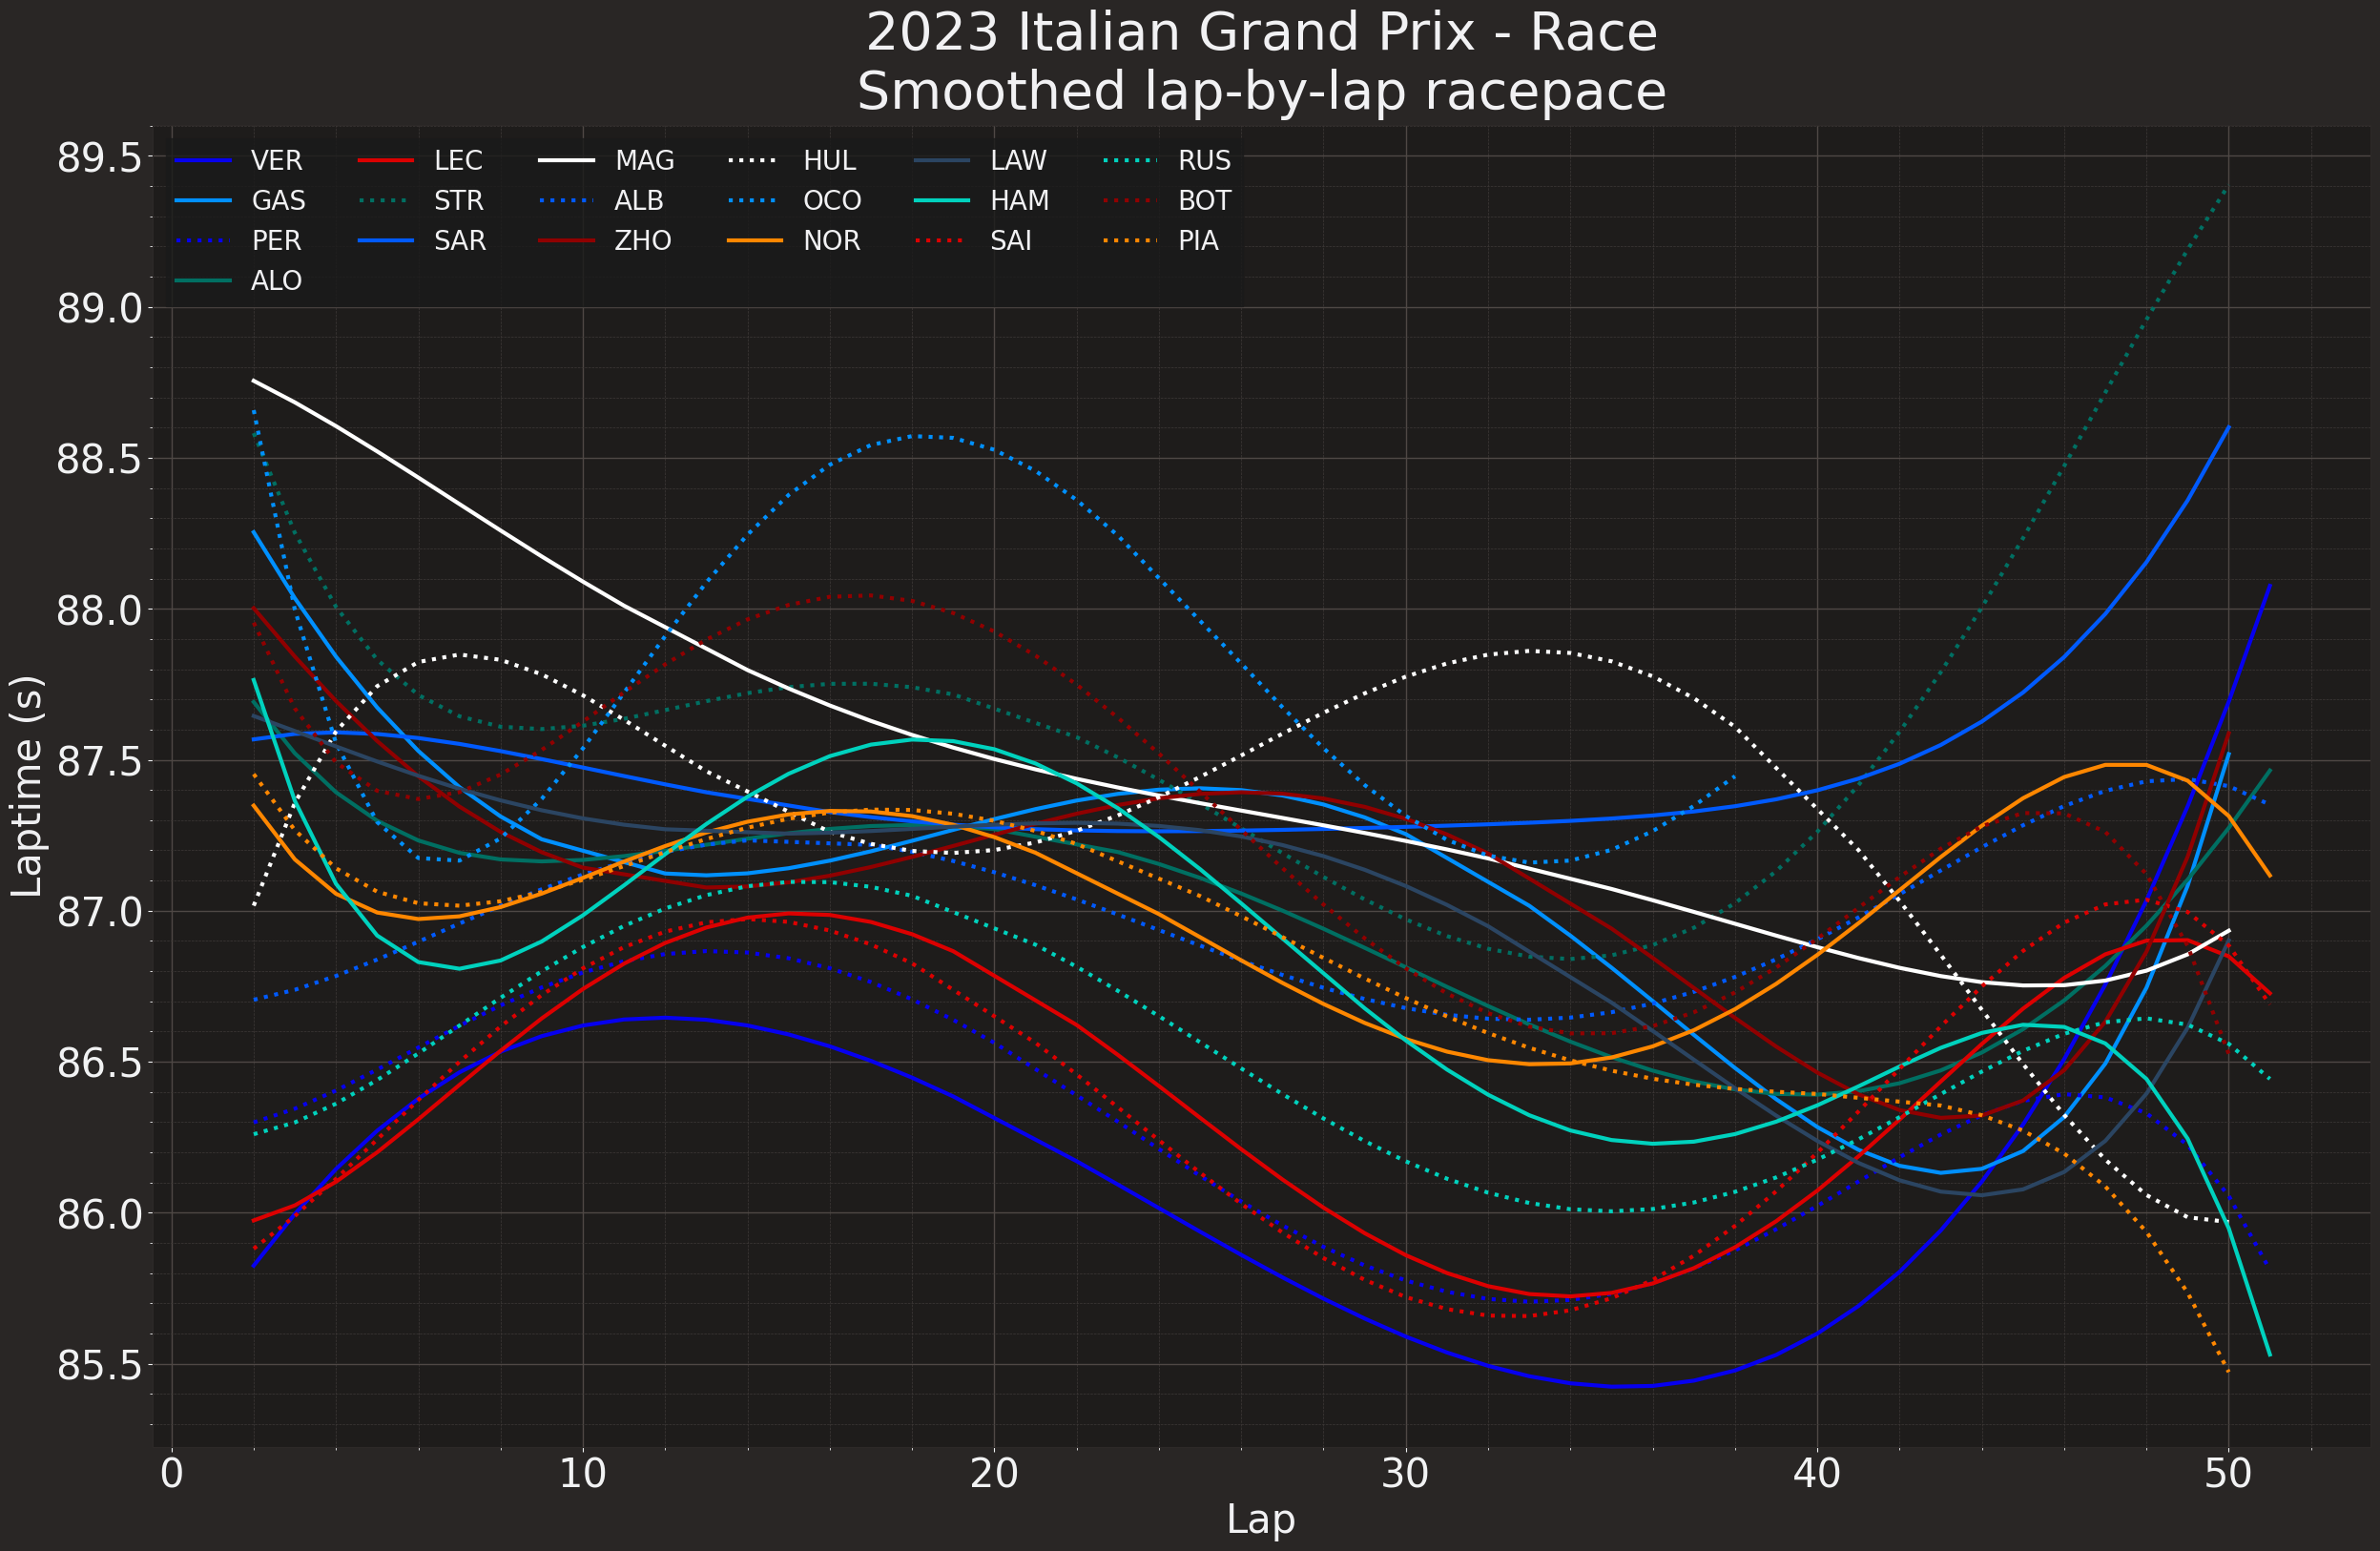

In [3]:
laps=fp.laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate']==True)]

# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

drivers_to_visualize = pd.unique(fp.laps['Driver'])
indices_to_remove = np.where(drivers_to_visualize == "TSU")[0]
drivers_to_visualize = np.delete(drivers_to_visualize, indices_to_remove)

ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []
team_colors = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)


##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
        
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

Text(0.5, 0, 'Lap')

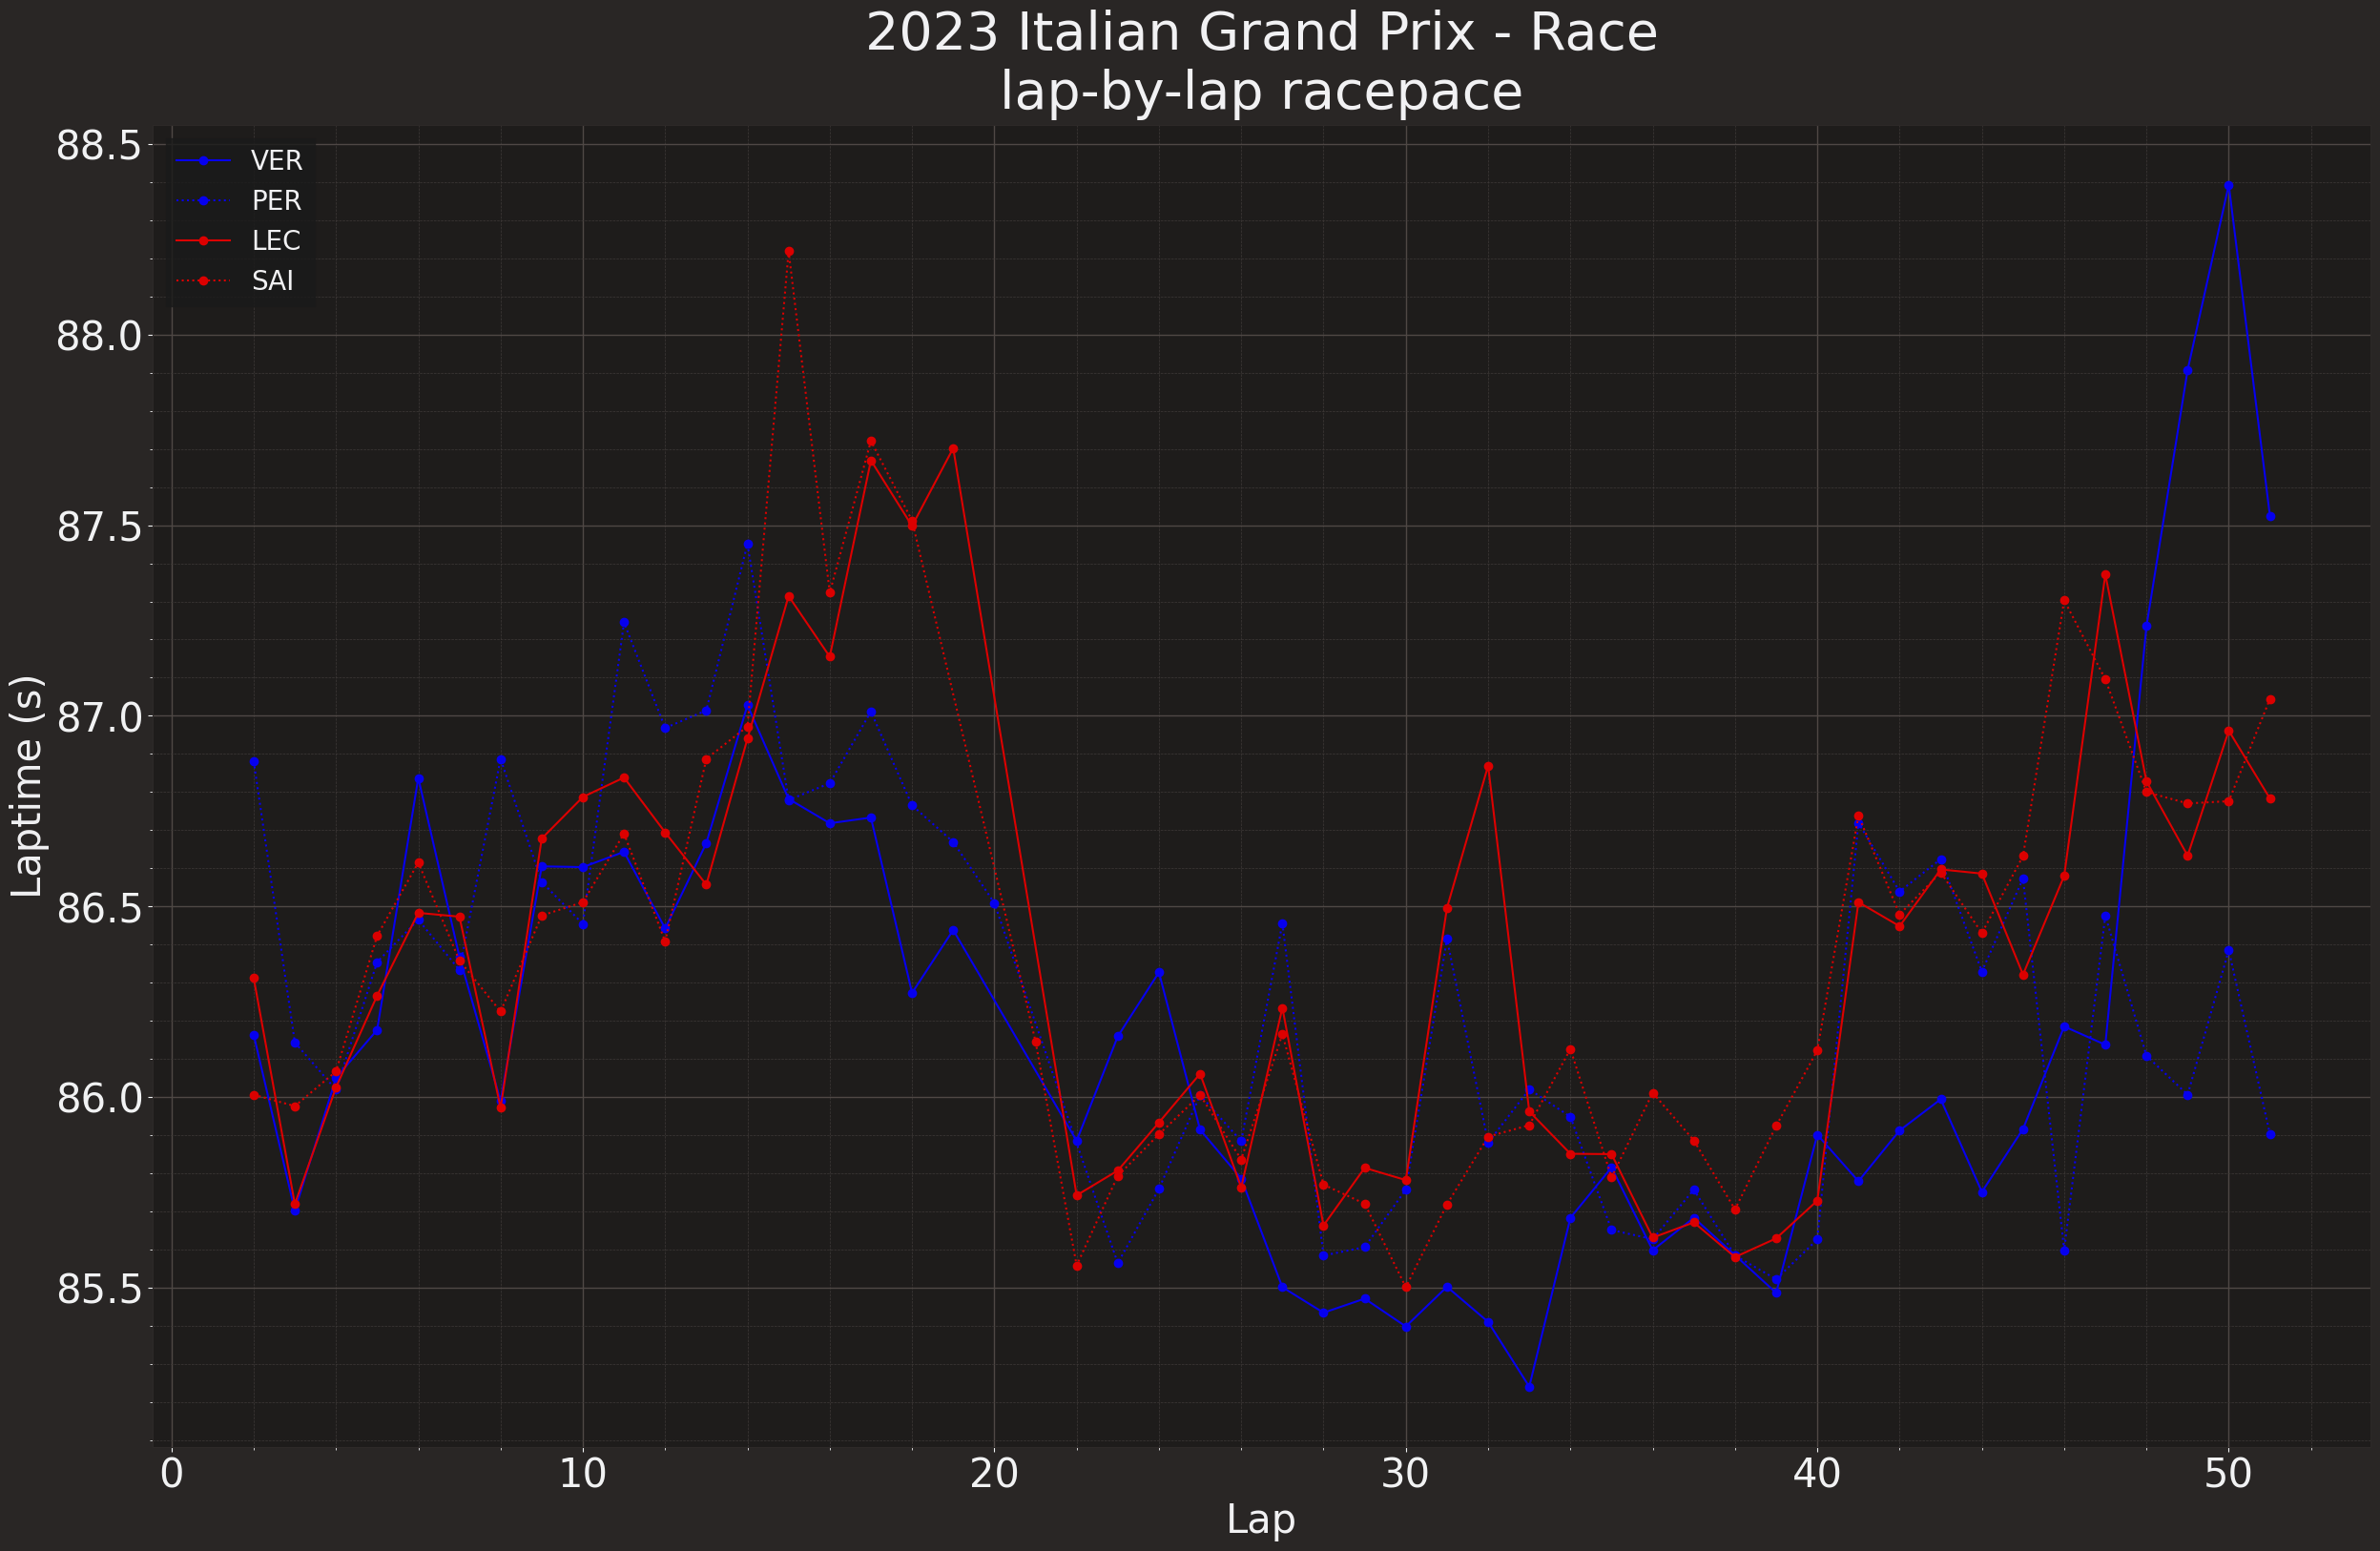

In [4]:
race_laps = fp.laps
drivers_to_visualize = ["VER", "PER", "LEC", "SAI"]
race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull() & race_laps['IsAccurate']==True)]
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]
ff1.plotting.setup_mpl()
# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()
# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    driver_laps = race_laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team', 'TyreLife']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=driver_laps['LapTimeSeconds']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, marker='o')
    
    # Append labels
    
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nlap-by-lap racepace", fontsize=40)
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
   
    visualized_teams.append(team)

plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

Text(0.5, 0, 'Lap')

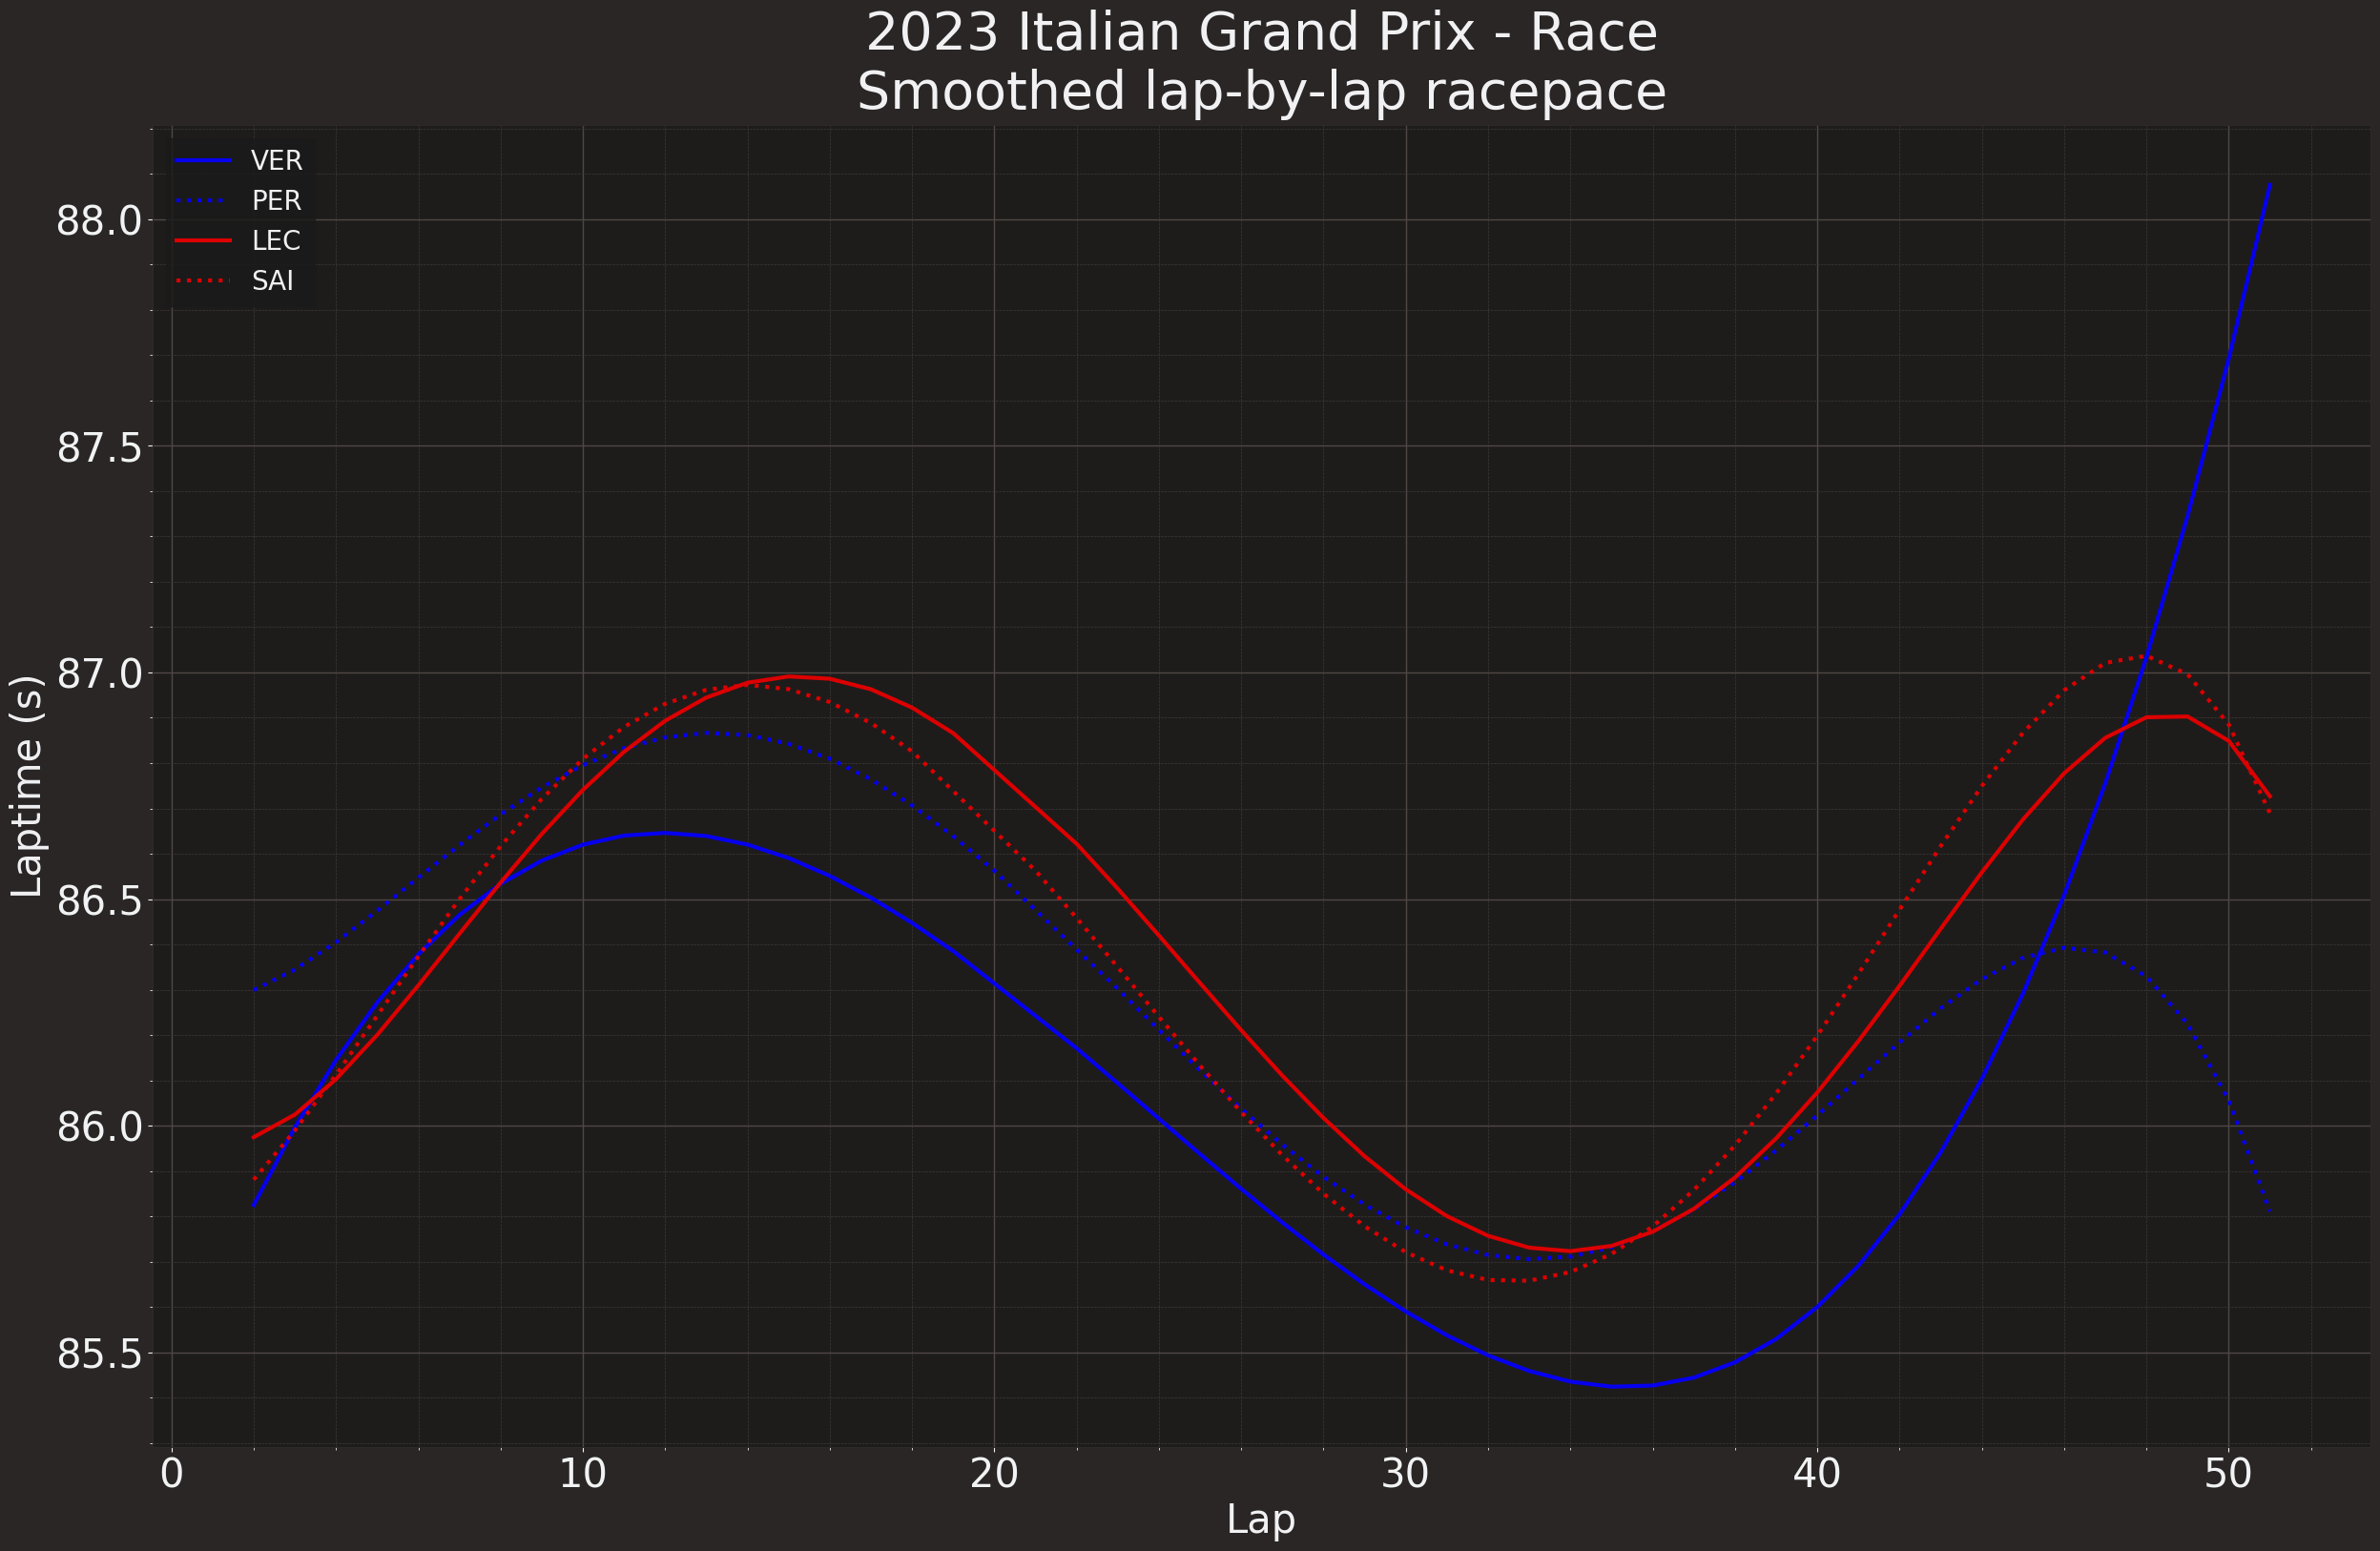

In [5]:
laps=fp.laps
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps = laps.loc[(laps['PitOutTime'].isnull() & laps['PitInTime'].isnull() & laps['IsAccurate']==True)]

# Also, we remove outliers since those don't represent the racepace,
# using the Inter-Quartile Range (IQR) proximity rule
q75, q25 = laps['LapTimeSeconds'].quantile(0.75), laps['LapTimeSeconds'].quantile(0.25)

intr_qr = q75 - q25

drivers_to_visualize = ["VER", "PER", "LEC", "SAI"]

ff1.plotting.setup_mpl()
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []
team_colors = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [30, 18]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots(1)


##############################
#
# Lap-by-lap racepace comparison
#
##############################
for driver in drivers_to_visualize:

    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=3)
        
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nSmoothed lap-by-lap racepace", fontsize=40)

    # Generate legend
    ax.legend(ncol=len(drivers_to_visualize)/3, prop={'size': 20})
    ax.tick_params(labelsize=30)
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)
plt.ylabel("Laptime (s)", fontsize=30)
plt.xlabel("Lap", fontsize=30)

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Monza', 'R')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()
race_laps = fp.laps

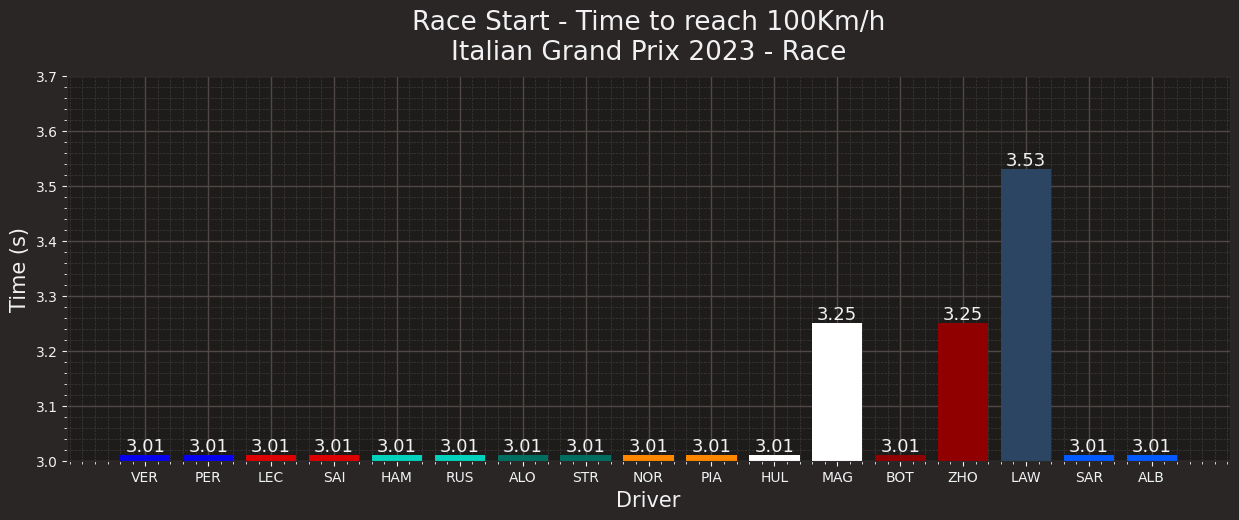

In [15]:
from collections import OrderedDict
race_laps = race_laps.loc[race_laps['LapNumber']==1]
drivers = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'HUL', 'BOT', 'ZHO', 'SAR', 'ALB', 'LAW', 'MAG']
tel_dict = dict.fromkeys(drivers)
time_dict = dict.fromkeys(drivers)

for driver in drivers:
        tel_dict[driver] = (race_laps.pick_driver(driver).get_car_data().query('Speed >= 100'))['Time'].iloc[0].total_seconds()       

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'STR', 'NOR', 'PIA', 'HUL', 'MAG', 'BOT', 'ZHO', 'LAW', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

tel_dict_ordered = OrderedDict((k, tel_dict[k]) for k in team_color_drvrs)
tel_dict_ordered = dict(tel_dict_ordered)

for key in tel_dict_ordered:
        tel_dict_ordered[key] = round(tel_dict_ordered[key], 2)

ff1.plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar_label(plt.bar(range(len(tel_dict_ordered)), list(tel_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(tel_dict_ordered)), list(tel_dict_ordered.keys()))
plt.title(f"Race Start - Time to reach 100Km/h\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
ax.set_ylim([3.0, 3.7])

plt.xlabel('Driver', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.show()

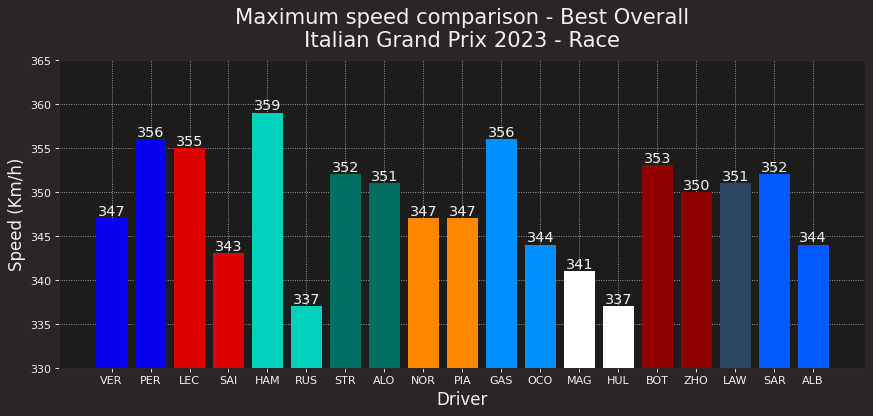

In [18]:
from collections import OrderedDict
fp_laps = fp.laps
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull())]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
            max_speed_dict[driver] = max(fp_laps.pick_driver(driver).get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'STR', 'ALO', 'NOR', 'PIA','GAS', 'OCO', 'MAG', 'HUL', 'BOT',  'ZHO', 'LAW', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'), 
               ff1.plotting.team_color('Alpha Tauri'), 
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)

ff1.plotting.setup_mpl()
figure(figsize=(13, 5), dpi=80)
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))

ax = plt.gca()
ax.set_ylim([330, 365])
plt.title(f"Maximum speed comparison - Best Overall\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=True, linestyle=':')
plt.xlabel('Driver', fontsize=15)
plt.ylabel('Speed (Km/h)', fontsize=15)
plt.show()

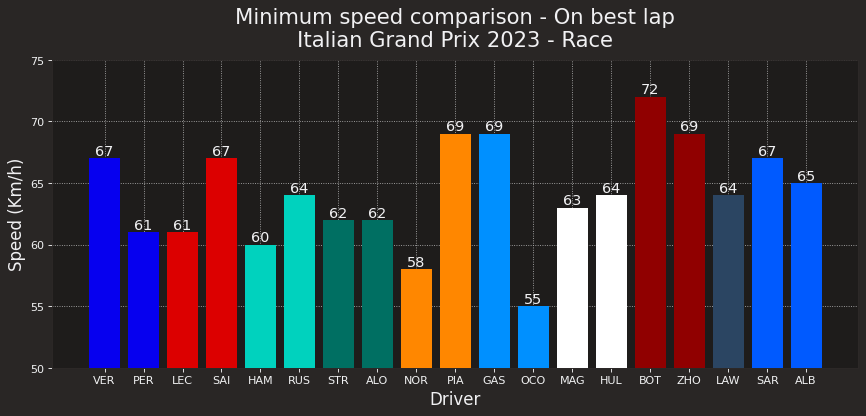

In [21]:
from collections import OrderedDict
fp_laps = fp.laps
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
indices_to_remove = np.where(drivers == "TSU")[0]
drivers = np.delete(drivers, indices_to_remove)
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

#dizionario dove inerirò tutte le massime velocità, le chiavi sono i nom dei piloti 
max_speed_dict = dict.fromkeys(drivers)

for driver in drivers:
        max_speed_dict[driver] = min(fp_laps.pick_driver(driver).pick_fastest().get_car_data()['Speed'])

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'STR', 'ALO', 'NOR', 'PIA','GAS', 'OCO', 'MAG', 'HUL', 'BOT',  'ZHO', 'LAW', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Alpine'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), ff1.plotting.team_color('Alfa Romeo'), 
               ff1.plotting.team_color('Alpha Tauri'), 
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

max_speed_dict_ordered = OrderedDict((k, max_speed_dict[k]) for k in team_color_drvrs)
max_speed_dict_ordered = dict(max_speed_dict_ordered)

ff1.plotting.setup_mpl()
figure(figsize=(13, 5), dpi=80)
plt.bar_label(plt.bar(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(max_speed_dict_ordered)), list(max_speed_dict_ordered.keys()))

ax = plt.gca()
ax.set_ylim([50, 75])
plt.title(f"Minimum speed comparison - On best lap\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=True, linestyle=':')
plt.xlabel('Driver', fontsize=15)
plt.ylabel('Speed (Km/h)', fontsize=15)
plt.show()

# Team pace

In [24]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [ ]:
race = fastf1.get_session(2023, "BMonza", 'R')
race.load()
laps = race.laps.pick_quicklaps()

In [85]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)
# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

display(team_palette)



Index(['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren', 'AlphaTauri',
       'Aston Martin', 'Alfa Romeo', 'Williams', 'Haas F1 Team', 'Alpine'],
      dtype='object', name='Team')


{'Red Bull Racing': '#0600ef',
 'Ferrari': '#dc0000',
 'Mercedes': '#00d2be',
 'McLaren': '#ff8700',
 'AlphaTauri': '#2b4562',
 'Aston Martin': '#006f62',
 'Alfa Romeo': '#900000',
 'Williams': '#005aff',
 'Haas F1 Team': '#ffffff',
 'Alpine': '#0090ff'}

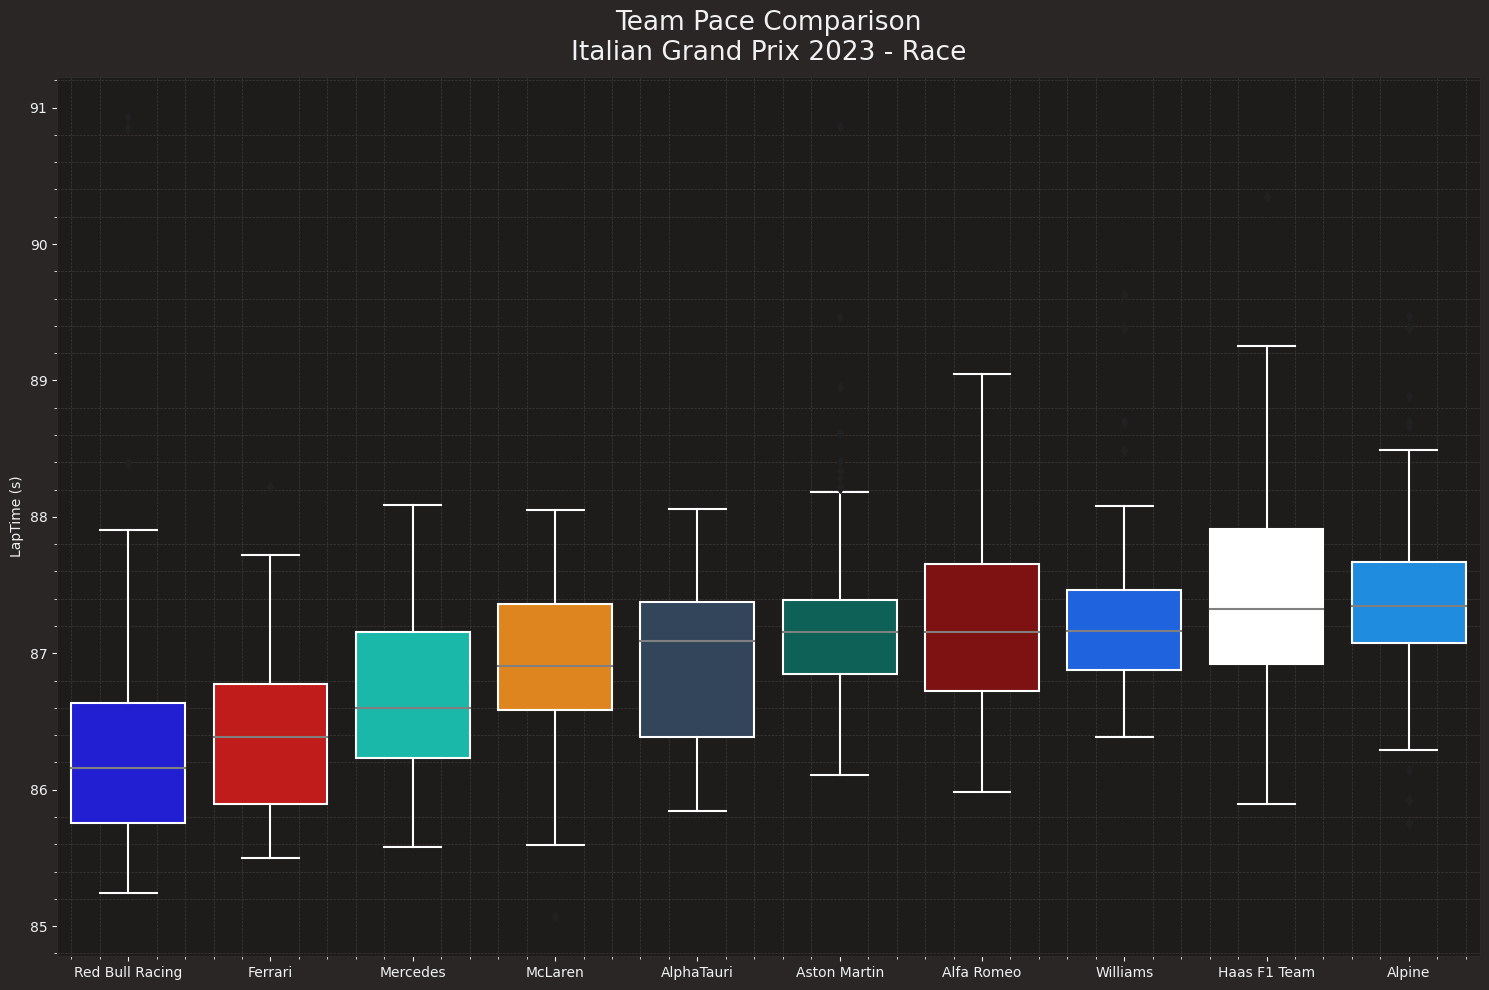

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"Team Pace Comparison\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=False)

ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [ ]:
race = fastf1.get_session(2023, "BMonza", 'R')
race.load()
laps = race.laps.pick_quicklaps()

In [87]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)
# make a color palette associating drivers to hex codes
driver_palette =  dict()
for driver in team_order:
    driver_palette[driver] = "#"+race.results[race.results['Abbreviation'] == driver]['TeamColor'].values[0]

display(driver_palette)

Index(['VER', 'SAI', 'PER', 'RUS', 'LEC', 'PIA', 'HAM', 'ALB', 'ALO', 'NOR',
       'LAW', 'ZHO', 'GAS', 'BOT', 'SAR', 'HUL', 'STR', 'MAG', 'OCO'],
      dtype='object', name='Driver')


dict

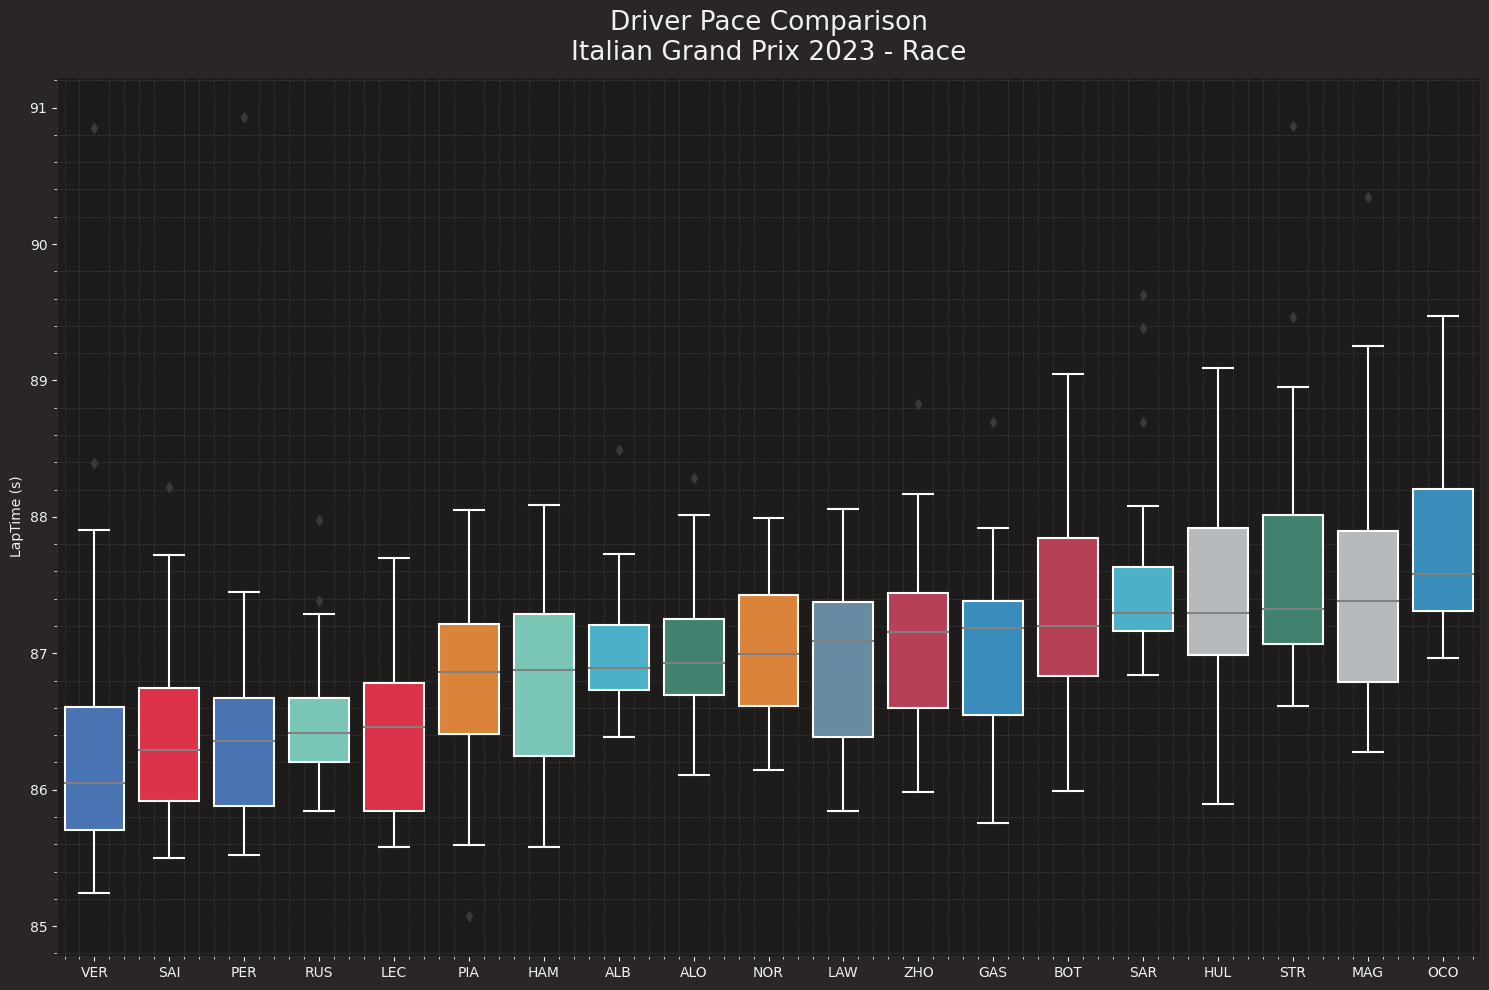

In [95]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    order=team_order,
    palette=driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"Driver Pace Comparison\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=False)

ax.set(xlabel=None)
plt.tight_layout()
plt.show()